# Investing On ETFs Using The Kelly Formula Part 1

## How To Retrieve ETF Data Using Python 

## Introduction
The main problem of an investor is identifying profitable trading strategies.
To solve this, he uses fundamental and quantitative techniques to pick winning trading systems.
The next problem concerning the investor is how to optimally allocate his capital to these different winning strategies.
To solve this, he uses the Kelly formula to calculate the amount of capital he will deploy to the securities or strategies in front of him.

In this article, I will source Vanguard ETFs list from the their website using Python package Selenium. 
I will use the list to pull historical Open-High-Low-Close-Volume (OHCLV) data using Python package pandas-datareader.
The ETF data collected in this article will be used in the next article to present the investor's problem of capital allocation using the Kelly formula.

## Exchange Traded Fund (ETF)
ETFs are traded on major stock exchanges like the New York Stock Exchange and Nasdaq.
You can buy and sell them using online brokers such as TD Ameritrade or Interactive Brokers.
An ETF is a composed of tens or hundreds of stocks or bonds in a single fund.
ETFs are popular because they provide the following:
1. Low costs: Average expense ratio of 0.27% per year.
2. Diversification: Buying SPY (ETF on S&P 500 index) vs TSLA.
3. Alternative themes: Gain exposure on water resources or solar technology firms.

## Vanguard
Vanguard was established in 1975 by John Bogle, the father of passive investing. It specializes in low-cost investing, and offers both indexed and actively managed funds. Vanguard has USD 5.2 trillion of assets under management as of January 2019.

## Vanguard ETFs
In this article, we will use Vanguard ETFs which are grouped by:
1. US Bond ETFs: They provide a steady stream of income but with potentially lower growth. 
2. US Stock ETFs: They provide potentially higher growth but with increased volatility. 
3. International Bond ETFs: Same as US Bond ETFs but with added diversification.
4. International Stock ETFs: Same as US Stock ETFs but with added diversification.
5. Sector ETFs: They provide access to specific segments of the market.

## Step By Step
1. Source Vanguard ETFs list of tickers.
2. Source Vanguard ETFs historical OHLCV data.

## Source Vanguard ETFs List Of Tickers
In this section, we retrieve tickers of every ETF on Vanguard's website.
We use Selenium, a web browser automation tool, to help us retrieve the ETF tickers.
We propose two approaches, direct and indirect, of sourcing ETF ticker data from website.

### Selenium
[Selenium](https://www.seleniumhq.org) automates web browsers.
Selenium was initially conceived for automation of web application testing.
It allows you to open a browser and automate actions like clicking buttons and completing forms.

I propose two ways of using Selenium scrape of ETF ticker data:
1. An automated approach: We automate navigation of Vanguard's web site by going from the home page to the ETF list page containing the tickers.
2. A non-automated approach: We go directly to the ETF list page containing the tickers.

Import packages

In [1]:
import pandas as pd
from pandas import Series, DataFrame
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import pandas_datareader as web
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

### Automated Approrach
Code for scraping ETF tickers from Vanguard's home page using the first approach.

In [2]:
# # Option
# option = webdriver.ChromeOptions()
# option.add_argument('--incognito')

# # Create a Chrome webdriver 
# driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# # Get to the Vanguard home page
# driver.get('https://investor.vanguard.com/home/')

# # Set delay in seconds
# delay = 10 

# # Head to the next page by clicking on 'Investing'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Investing')))
#     driver.find_element_by_link_text('Investing').click()
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# # Head to the next page by clicking on 'Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Vanguard ETFs')))
#     driver.find_element_by_link_text('Vanguard ETFs').click()
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# # Head to the next page by clicking on 'Browse a list of Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Browse a list of Vanguard ETFs')))
#     driver.find_element_by_partial_link_text('Browse a list of Vanguard ETFs').click()
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# # Source the Vanguard ETF names and tickers
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
#     content = driver.find_elements_by_class_name('productEntry')
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

### Non-automated Approach
Code for scraping ETF tickers from Vanguard's ETF list page.

In [3]:
# Option
option = webdriver.ChromeOptions()
option.add_argument('--incognito')

# Create a Chrome webdriver 
driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# Get to the Vanguard ETF list page
driver.get('https://investor.vanguard.com/etf/list#/etf/asset-class/month-end-returns')

# Set delay in seconds
delay = 10

try:
    WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
    # Source the Vanguard ETF names and tickers
    content = driver.find_elements_by_class_name('productEntry')
except TimeoutException:
    print("Timed out waiting for page to load.")
    driver.quit()

### Vanguard ETFs

Inspect the content collected

In [4]:
len(content)

118

In [5]:
for i in content:
    print(i.text)




















Large-Cap ETF
Mega Cap ETF
Mega Cap Growth ETF
Mega Cap Value ETF
Vanguard Select Funds
S&P 500 ETF
Vanguard Select Funds
Total Stock Market ETF
Value ETF
Vanguard Select Funds
Extended Market ETF
Mid-Cap ETF
Mid-Cap Growth ETF
Mid-Cap Value ETF
Small-Cap ETF
Small-Cap Growth ETF
Small-Cap Value ETF
Total World Bond ETF
Vanguard Select Funds
Total International Bond ETF
Emerging Markets Government Bond ETF
Total World Stock ETF
ESG International Stock ETF
FTSE All-World ex-US ETF
FTSE All-World ex-US Small-Cap ETF
Vanguard Select Funds
FTSE Developed Markets ETF
FTSE Europe ETF
FTSE Pacific ETF
Global ex-U.S. Real Estate ETF
International Dividend Appreciation ETF
International High Dividend Yield ETF
Vanguard Select Funds
Total International Stock ETF
Vanguard Select Funds
FTSE Emerging Markets ETF
Communication Services ETF
Consumer Discretionary ETF
Consumer Staples ETF
Energy ETF
Financials ETF
Health Care ETF
Industrials ETF
Information Technology ETF
Materials 

We notice the following structure:
1. Elements 0-58 are the names of the ETFs.
2. Elements 59-118 are the tickers, asset class, etc. of the ETFs.

Create lists to hold ETF names and tickers

In [6]:
# Initialize the lists
etf_names = []
etf_tickers = []

for i in range(0, 59):
    # Get the names
    try:
        etf_names.append(content[i].text.split('\n')[1])
    except IndexError:
        etf_names.append(content[i].text)
    
    # Get the tickers
    etf_tickers.append(content[i + 59].text.split()[0])

Create a DataFrame mapping an ETF's name to it's ticker

In [7]:
etf_map = pd.DataFrame({'Name': etf_names,
                        'Ticker': etf_tickers})

### Vanguard ETFs By Group
Create a DataFrame mapping an ETF's name to it's ticker by group.

In [8]:
etf_us_bonds_map = etf_map.iloc[0:15]
etf_us_stocks_map = etf_map.iloc[15:33]
etf_intl_bonds_map = etf_map.iloc[33:36]
etf_intl_stocks_map = etf_map.iloc[36:48]
etf_sectors_map = etf_map.iloc[48:]

## Source Vanguard ETFs Historical OHLCV Data

Set the parameters
1. Source is set to the Investors Exchange.
2. Start and end date are set to span 5 years from today.

In [9]:
source = 'iex'
start = '2014-01-01'
end = '2020-01-01'

### Vanguard ETFs

Pull historical OHLCV data from the Investors Exchange

In [10]:
# List of tickers
etf_list = etf_map['Ticker'].tolist()

# Initialize data
etf_data = web.DataReader(etf_list[0], source, start, end)
# Conver index to datetime
etf_data.index = pd.to_datetime(etf_data.index)

for i in range(1, len(etf_list)):
    # Pull new data
    temp_data = web.DataReader(etf_list[i], source, start, end)
    
    # Update data
    etf_data = pd.concat([etf_data, temp_data], axis=1, sort=True)
    
# Set multi-level columns
etf_data.columns = pd.MultiIndex.from_product([etf_list, temp_data.columns])

Inspect

In [11]:
etf_data.head()

EDV                                        BIV           \
               open     high      low    close volume     open     high   
date                                                                      
2014-06-11  85.3252  85.4117  84.5078  85.2044  93263  72.0370  72.1399   
2014-06-12  85.2790  86.4896  84.7732  86.2077  34454  72.1485  72.3372   
2014-06-13  85.6853  86.9375  85.6853  86.2824  36060  72.0456  72.2427   
2014-06-16  86.4233  86.7762  86.0253  86.5809  72137  72.2428  72.2600   
2014-06-17  86.3404  86.3404  85.5029  85.7336  55781  72.1313  72.1313   

                                       ...         VNQ                    \
                low    close  volume   ...        open     high      low   
date                                   ...                                 
2014-06-11  72.0031  72.0970  172010   ...     60.0078  60.3470  59.7930   
2014-06-12  72.0884  72.3372  325751   ...     60.0805  60.1289  59.4764   
2014-06-13  72.0371  72.1999  156542   ...     59.9351  60.1855  59.5394   
2014-06-16  72.1571  72.2257  390893   ...     60.0401  60.2920  59.6929   
2014-06-17  71.9426  71.9426  306016   ...     59.7413  59.9997  59.5171   

                                  VPU                                      
              close   volume     open     high      low    close   volume  
date                                                                       
2014-06-11  60.0885  2365893  78.8160  78.9772  78.1879  78.1879    94691  
2014-06-12  59.9351  2249588  78.0776  78.5698  77.2797  78.4256    96214  
2014-06-13  60.0885  1853138  78.2643  78.9518  78.0521  78.8499    99422  
2014-06-16  59.7817  2643862  78.9348  79.9788  78.7803  79.4101  1006261  
2014-06-17  59.9351  1942368  79.3168  79.5544  78.9857  79.3592   265682  

[5 rows x 295 columns]

In [12]:
etf_data.tail()

EDV                                        BIV          \
              open      high       low   close  volume   open    high   
date                                                                    
2019-06-04  126.69  127.0600  125.4438  125.85  229388  85.30  85.462   
2019-06-05  125.13  125.5000  124.4900  124.60  301695  85.51  85.640   
2019-06-06  125.85  126.5848  124.8075  125.26  137576  85.46  85.535   
2019-06-07  126.65  126.9993  126.1300  126.56   88292  85.76  85.830   
2019-06-10  125.42  125.4200  124.8400  125.20  153210  85.51  85.550   

                                     ...       VNQ                        \
                low  close  volume   ...      open    high    low  close   
date                                 ...                                   
2019-06-04  85.1937  85.35  948156   ...     87.25  87.250  85.95  86.71   
2019-06-05  85.3800  85.47  606893   ...     87.21  88.620  86.99  88.52   
2019-06-06  85.3200  85.40  572499   ...     88.80  88.890  88.05  88.69   
2019-06-07  85.5950  85.68  381772   ...     89.13  89.569  88.92  89.02   
2019-06-10  85.3900  85.40  350319   ...     89.19  89.290  88.40  88.73   

                        VPU                                       
             volume    open      high       low   close   volume  
date                                                              
2019-06-04  6993156  131.22  131.2200  128.7500  131.14   153337  
2019-06-05  6775425  131.67  134.1402  131.2348  133.75   243189  
2019-06-06  4077190  133.91  134.7300  133.6399  134.52  1183343  
2019-06-07  3525699  135.29  135.9600  133.6300  133.66   235898  
2019-06-10  2945455  133.33  133.4100  132.1900  132.80   237848  

[5 rows x 295 columns]

### Vanguard ETFs By Group

Create DataFrame objects containing close prices of ETFs by group.

In [13]:
# Create list of Vanguard ETF groups
groups = ['us bonds',
          'us stocks',
          'intl bonds',
          'intl stocks',
          'sectors']

# Create a dictionary of Vanguard ETF maps
maps = {'us bonds': etf_us_bonds_map,
        'us stocks': etf_us_stocks_map,
        'intl bonds': etf_intl_bonds_map,
        'intl stocks': etf_intl_stocks_map,
        'sectors': etf_sectors_map}

# Initialize Vanguard ETF close dictionary
close = {'us bonds': pd.DataFrame(),
         'us stocks': pd.DataFrame(),
         'intl bonds': pd.DataFrame(),
         'intl stocks': pd.DataFrame(),
         'sectors': pd.DataFrame()}

# Update Vanguard ETF close dictionary
for i in groups:
    # Set tickers
    tickers = maps[i]['Ticker'].tolist()
     
    res = {}
    for j in range(len(tickers)):
        res[tickers[j]] = etf_data[tickers[j]].close
        
    # Update close prices 
    close[i] = pd.DataFrame(res)

### Vanguard US Bond ETFs

In [14]:
etf_us_bonds_close = close['us bonds']

Inspect

In [15]:
etf_us_bonds_close.head()

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,VCIT,VCLT,VCSH,VTC,VTEB
date,,,,,,,,,,,,,,,
2014-06-11,85.2044,72.0970,58.1717,72.4955,60.7983,46.7002,73.6636,47.2074,57.4925,71.4683,72.5664,71.4241,71.7676,NaN,NaN
2014-06-12,86.2077,72.3372,58.3027,72.9509,61.2526,46.7804,73.7095,47.2736,57.5397,71.6522,72.7439,71.9479,71.7766,NaN,NaN
2014-06-13,86.2824,72.1999,58.2387,72.9960,61.3021,46.7268,73.6636,47.2263,57.5113,71.6347,72.6340,71.9076,71.7676,NaN,NaN
2014-06-16,86.5809,72.2257,58.1847,73.0862,61.3876,46.7358,73.6360,47.2168,57.4925,71.6172,72.6847,71.9882,71.6871,NaN,NaN
2014-06-17,85.7336,71.9426,58.0467,72.6678,61.0080,46.6733,73.5809,47.2168,57.4641,71.4508,72.3635,71.6739,71.6692,NaN,NaN


In [16]:
etf_us_bonds_close.tail()

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,VCIT,VCLT,VCSH,VTC,VTEB
date,,,,,,,,,,,,,,,
2019-06-04,125.85,85.35,65.45,94.54,80.46,52.56,80.13,49.26,60.72,82.14,88.09,92.94,80.04,NaN,NaN
2019-06-05,124.60,85.47,65.50,94.15,80.02,52.52,80.21,49.30,60.77,82.14,88.14,92.77,80.13,NaN,NaN
2019-06-06,125.26,85.40,65.44,94.50,80.27,52.53,80.12,49.28,60.72,82.12,88.13,93.04,80.09,NaN,NaN
2019-06-07,126.56,85.68,65.61,95.18,80.92,52.62,80.23,49.37,60.78,82.34,88.46,93.78,80.20,NaN,NaN
2019-06-10,125.20,85.40,65.40,94.63,80.20,52.54,80.13,49.26,60.72,82.17,88.21,93.50,80.14,NaN,NaN


VTC and VTEB close prices are NaNs, we drop these funds.

In [17]:
etf_us_bonds_close.drop(['VTC', 'VTEB'], axis='columns', inplace=True)

### Vanguard US Stock ETFs

In [18]:
etf_us_stocks_close = close['us stocks']

Inspect

In [19]:
etf_us_stocks_close.head()

,VIG,ESGV,VUG,VYM,VV,MGC,MGK,MGV,VOO,VTI,VTV,VXF,VO,VOT,VOE,VB,VBK,VBR
date,,,,,,,,,,,,,,,,,,
2014-06-11,70.0811,NaN,92.0676,56.6140,81.1266,60.1781,71.3388,51.1467,161.5770,91.7313,71.1296,79.9828,108.2390,91.1457,76.8441,105.9931,117.8034,93.7221
2014-06-12,69.5502,NaN,91.2609,56.2715,80.5827,59.7627,70.6379,50.7774,160.3744,91.0774,70.6714,79.4990,107.5091,90.5219,76.4035,105.3637,117.2411,93.1253
2014-06-13,69.6492,NaN,91.4579,56.5027,80.8184,59.9253,70.7875,51.0587,160.8808,91.3771,70.9886,79.7502,107.9332,90.7654,76.7002,105.7062,117.6700,93.3694
2014-06-16,69.6852,NaN,91.5235,56.6654,80.9272,60.0065,70.8623,51.0499,161.0164,91.4498,71.0591,79.8898,108.0167,90.8770,76.7722,105.9931,118.2894,93.4056
2014-06-17,69.8382,NaN,91.7017,56.7596,81.1175,60.1510,70.9464,51.2082,161.4414,91.7767,71.2706,80.5038,108.4983,91.2417,77.1947,106.7613,119.2423,94.1741


In [20]:
etf_us_stocks_close.tail()

,VIG,ESGV,VUG,VYM,VV,MGC,MGK,MGV,VOO,VTI,VTV,VXF,VO,VOT,VOE,VB,VBK,VBR
date,,,,,,,,,,,,,,,,,,
2019-06-04,110.73,NaN,154.70,84.98,128.83,96.8400,122.35,77.91,257.67,143.56,107.30,114.16,160.39,143.04,107.28,150.88,177.26,127.12
2019-06-05,112.07,NaN,156.30,85.44,129.98,97.6700,123.66,78.47,259.85,144.66,107.96,114.62,161.93,144.68,108.01,151.40,178.53,127.16
2019-06-06,112.72,NaN,157.51,86.00,130.77,98.3100,124.52,78.90,261.54,145.47,108.63,114.78,162.81,145.49,108.60,151.57,178.89,127.16
2019-06-07,113.85,NaN,159.85,86.37,132.09,99.4358,126.65,79.31,264.15,146.79,109.17,115.48,163.73,146.65,108.93,152.51,180.71,127.58
2019-06-10,114.09,NaN,160.82,86.55,132.76,99.8900,127.40,79.60,265.39,147.61,109.52,116.27,164.53,147.65,109.24,153.47,182.04,128.09


ESGV close prices are NaNs, we drop this fund.

In [21]:
etf_us_stocks_close.drop('ESGV', axis='columns', inplace=True)

### Vanguard International Bond ETFs

In [22]:
etf_intl_bonds_close = close['intl bonds']

Inspect

In [23]:
etf_intl_bonds_close.head()

,BNDW,BNDX,VWOB
date,,,
2014-06-11,NaN,46.2723,64.0600
2014-06-12,NaN,46.3357,63.9766
2014-06-13,NaN,46.3538,63.9528
2014-06-16,NaN,46.3357,63.8257
2014-06-17,NaN,46.2995,63.7462


In [24]:
etf_intl_bonds_close.tail()

,BNDW,BNDX,VWOB
date,,,
2019-06-04,NaN,56.52,78.12
2019-06-05,NaN,56.61,78.37
2019-06-06,NaN,56.67,78.64
2019-06-07,NaN,56.82,78.87
2019-06-10,NaN,56.71,78.96


BNDW close prices are NaNs, we drop this fund.

In [25]:
etf_intl_bonds_close.drop('BNDW', axis='columns', inplace=True)

### Vanguard International Stock ETFs

In [26]:
etf_intl_stocks_close = close['intl stocks']

Inspect

In [27]:
etf_intl_stocks_close.head()

,VT,VSGX,VEU,VSS,VEA,VGK,VPL,VNQI,VIGI,VYMI,VXUS,VWO
date,,,,,,,,,,,,
2014-06-11,55.3227,NaN,45.5170,96.4246,37.0376,52.0493,53.8933,47.1641,NaN,NaN,47.1573,38.2403
2014-06-12,55.1091,NaN,45.4997,96.7475,37.0462,52.0153,53.8583,47.0823,NaN,NaN,47.1400,38.0651
2014-06-13,55.2604,NaN,45.5516,96.6253,37.0376,51.9387,54.0336,47.1395,NaN,NaN,47.2005,38.2053
2014-06-16,55.2248,NaN,45.5256,96.3723,37.0635,51.9727,54.0161,47.0332,NaN,NaN,47.1573,37.9600
2014-06-17,55.3317,NaN,45.4217,96.1280,37.0203,51.9727,53.8671,46.9269,NaN,NaN,47.0967,37.9863


In [28]:
etf_intl_stocks_close.tail()

,VT,VSGX,VEU,VSS,VEA,VGK,VPL,VNQI,VIGI,VYMI,VXUS,VWO
date,,,,,,,,,,,,
2019-06-04,72.52,NaN,49.49,102.32,40.52,53.59,64.26,58.12,NaN,NaN,51.26,40.89
2019-06-05,72.77,NaN,49.43,102.31,40.50,53.57,64.20,57.91,NaN,NaN,51.14,40.59
2019-06-06,73.11,NaN,49.61,102.40,40.67,53.85,64.38,58.20,NaN,NaN,51.26,40.58
2019-06-07,73.85,NaN,50.13,103.50,41.15,54.56,65.05,58.50,NaN,NaN,51.85,40.87
2019-06-10,74.16,NaN,50.34,103.83,41.26,54.64,65.40,58.90,NaN,NaN,52.06,41.25


VSGX, VIGI, and VYMI close prices are NaNs, we drop these funds.

In [29]:
etf_intl_stocks_close.drop(['VSGX', 'VIGI', 'VYMI'], axis='columns', inplace=True)

### Vanguard Sector ETFs

In [30]:
etf_sectors_close = close['sectors']

Inspect

In [31]:
etf_sectors_close.head()

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
date,,,,,,,,,,,
2014-06-11,73.7660,100.7100,102.1572,120.9276,41.9468,102.1368,95.7923,89.6098,99.8913,60.0885,78.1879
2014-06-12,73.2093,99.4362,101.4614,121.4008,41.7458,101.6054,94.4731,88.8409,99.0038,59.9351,78.4256
2014-06-13,73.8089,99.5073,101.4878,122.6118,41.7458,101.5308,94.7460,89.4035,99.4385,60.0885,78.8499
2014-06-16,73.8688,99.8709,101.8401,123.2038,41.5917,101.8105,94.6732,89.5254,99.3027,59.7817,79.4101
2014-06-17,74.1943,100.2812,101.9634,123.0545,42.0086,101.8851,95.0098,89.8630,99.6558,59.9351,79.3592


In [32]:
etf_sectors_close.tail()

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
date,,,,,,,,,,,
2019-06-04,83.09,170.22,145.78,81.31,67.45,167.00,139.63,197.26,122.15,86.71,131.14
2019-06-05,83.15,171.09,147.27,80.19,67.76,168.02,140.89,199.81,122.77,88.52,133.75
2019-06-06,83.43,171.70,148.60,81.49,67.98,168.21,140.98,202.02,124.10,88.69,134.52
2019-06-07,84.47,174.18,149.93,81.82,67.81,170.42,142.08,205.55,125.00,89.02,133.66
2019-06-10,84.47,175.76,149.98,81.99,68.37,170.90,142.43,207.80,125.28,88.73,132.80


### Plot Of Vanguard ETFs By Group

(735395.0, 737220.0)

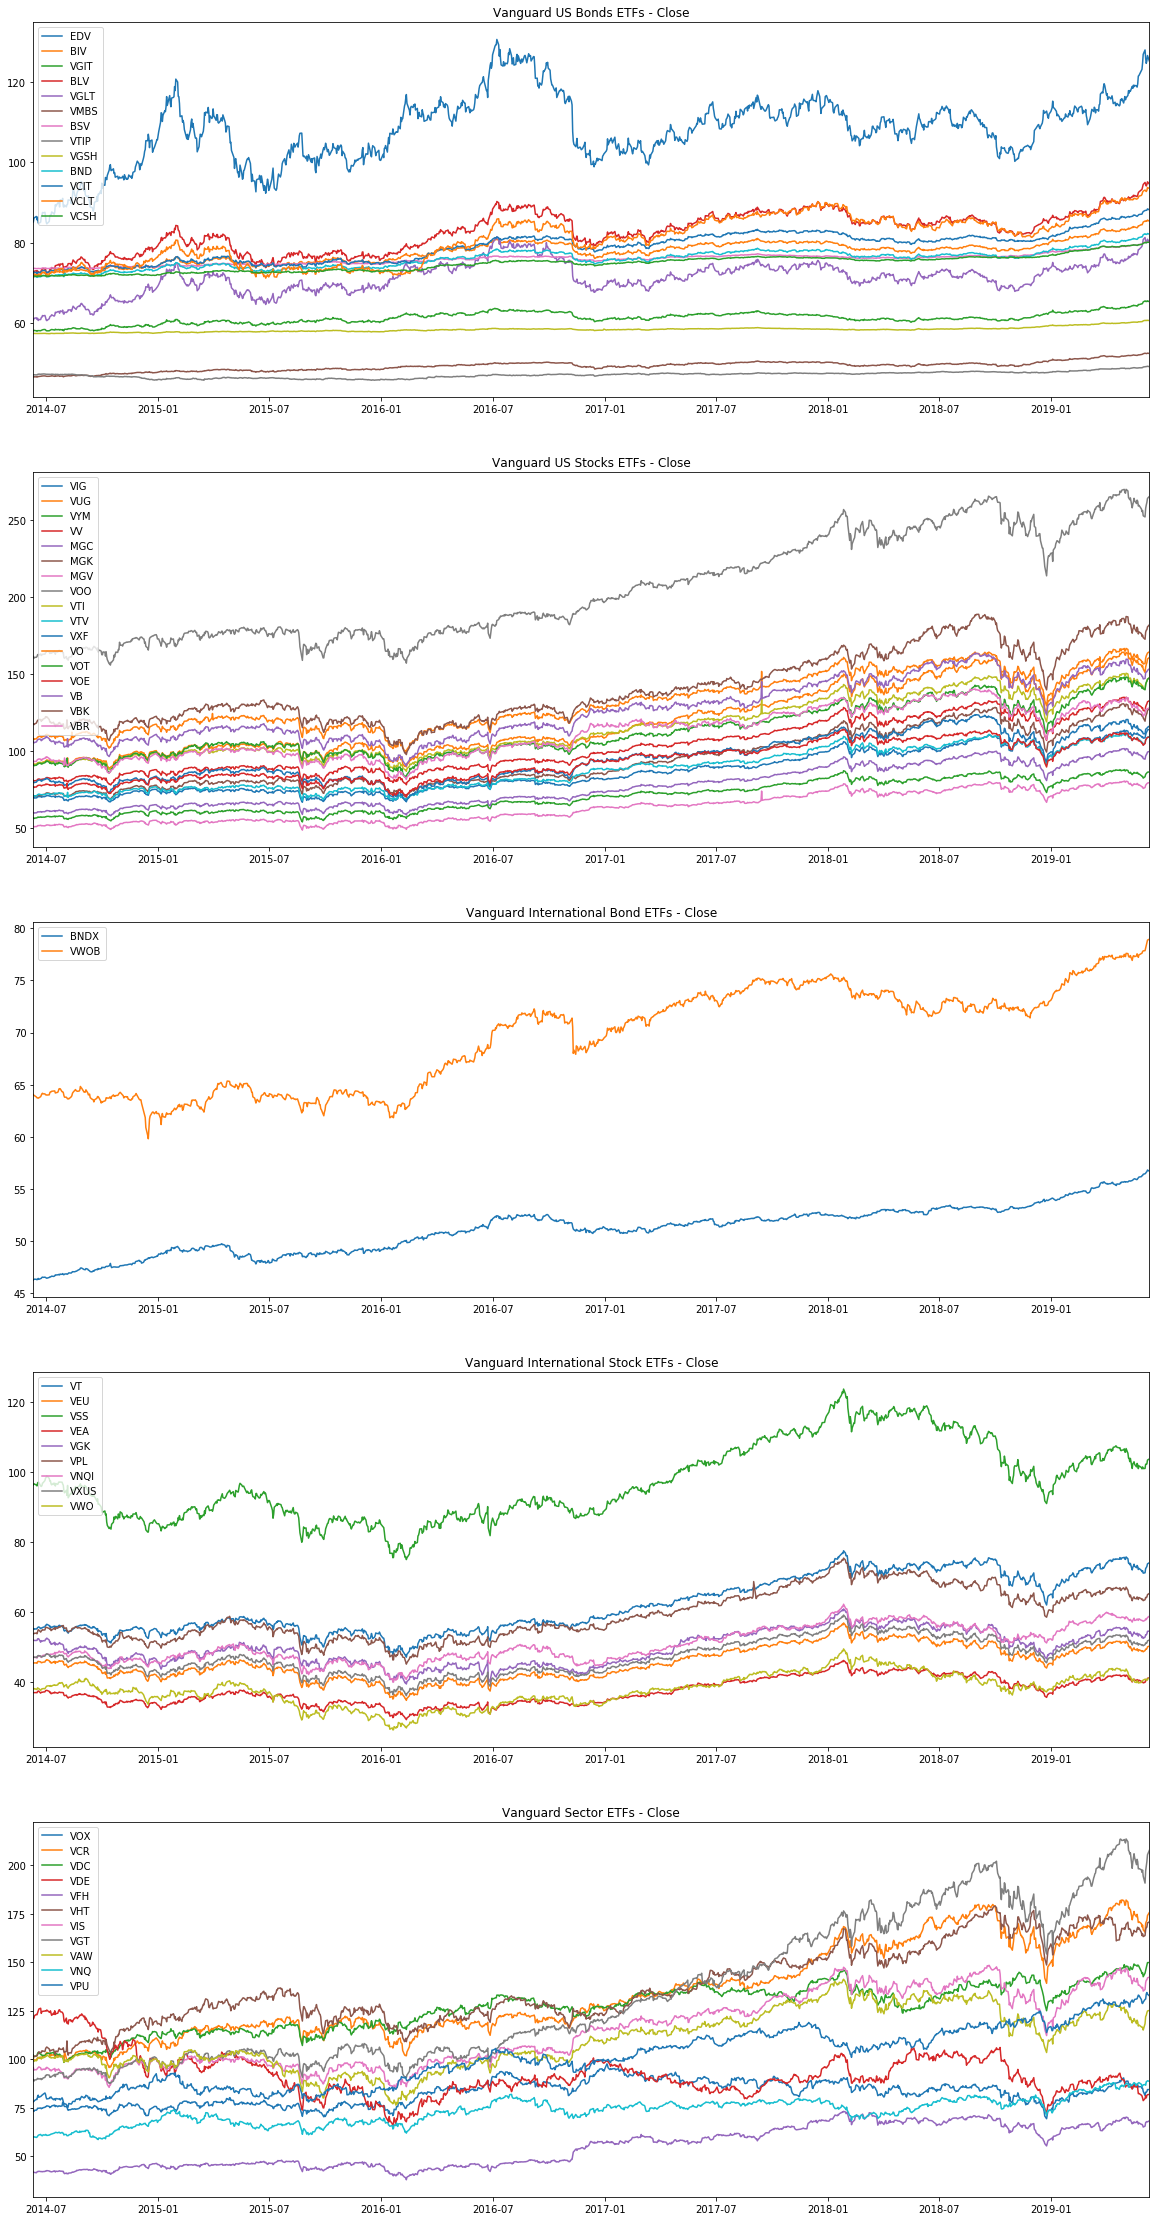

In [33]:
plt.figure(figsize=[20, 40])

# US Bonds
plt.subplot(5, 1, 1)
for i in etf_us_bonds_close.columns.tolist():
    plt.plot(etf_us_bonds_close[i])    
plt.title('Vanguard US Bonds ETFs - Close')
plt.legend(etf_us_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# US Stocks
plt.subplot(5, 1, 2)
for i in etf_us_stocks_close.columns.tolist():
    plt.plot(etf_us_stocks_close[i])    
plt.title('Vanguard US Stocks ETFs - Close')
plt.legend(etf_us_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Bonds
plt.subplot(5, 1, 3)
for i in etf_intl_bonds_close.columns.tolist():
    plt.plot(etf_intl_bonds_close[i])    
plt.title('Vanguard International Bond ETFs - Close')
plt.legend(etf_intl_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Stocks
plt.subplot(5, 1, 4)
for i in etf_intl_stocks_close.columns.tolist():
    plt.plot(etf_intl_stocks_close[i])    
plt.title('Vanguard International Stock ETFs - Close')
plt.legend(etf_intl_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Sectors
plt.subplot(5, 1, 5)
for i in etf_sectors_close.columns.tolist():
    plt.plot(etf_sectors_close[i])
plt.title('Vanguard Sector ETFs - Close')
plt.legend(etf_sectors_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

## Save The Data

Create a list of output files

In [34]:
output = ['etf_us_bonds.pickle', 
          'etf_us_stocks.pickle', 
          'etf_intl_bonds.pickle', 
          'etf_intl_stocks.pickle', 
          'etf_sectors.pickle']

Create a list of ETF data

In [35]:
data = [etf_us_bonds_close, 
        etf_us_stocks_close,
        etf_intl_bonds_close,
        etf_intl_stocks_close,
        etf_sectors_close]

Pickle

In [36]:
for i in range(len(output)):
    with open(output[i], 'wb') as f:
        pickle.dump(data[i], f)
    
    f.close()

## Conclusion
In this article, I showed how to scrape ETFs list from Vanguard web page, and pull historical OHLCV data from IEX.
I used Python packages Selenium and pandas-datareader for web scraping and sourcing datasets, respectively.
In the next article, I use the data to demonstrate the application of Kelly formula in investing.